In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [200]:
sample_size = 100
nr_sample = 20
nr_moments = 6

### Bounded distributions

In [201]:
bounded_dists = dm.get_bounded_distribution()
#dm.plot_histograms_of_samples(bounded_dists, sample_size, nr_sample)

In [202]:
moments_df = dem.get_moments_df(bounded_dists, nr_moments, nr_sample, sample_size)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,arcsine
3,0.471492,0.128040,0.000715,0.024022,0.000901,0.005001,arcsine
4,0.541186,0.126426,-0.008496,0.023988,-0.003463,0.005148,arcsine


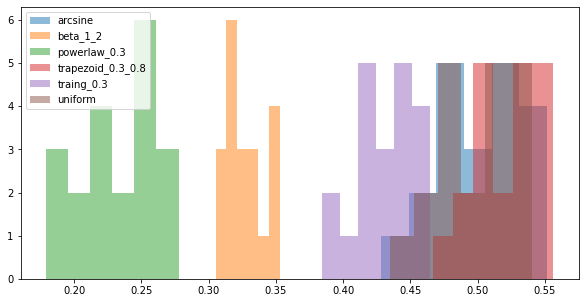

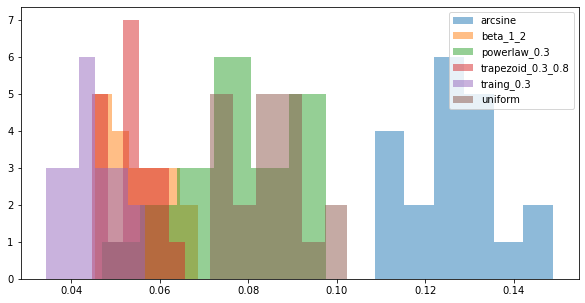

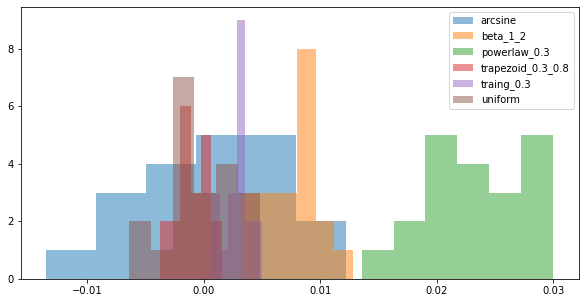

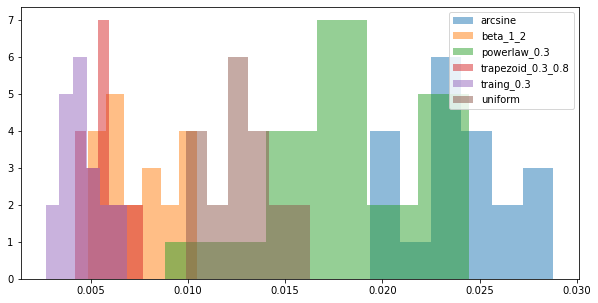

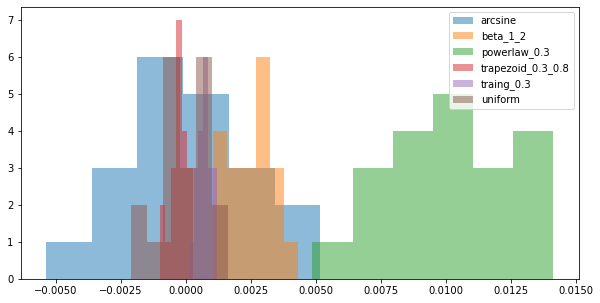

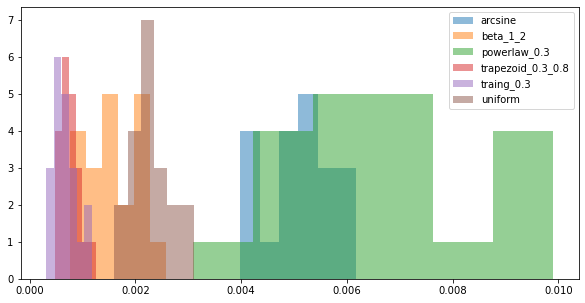

In [253]:
for i in range(nr_moments):
    fig, ax = plt.subplots(figsize=(10,5))
    moment_col = moments_df.iloc[:,[i,-1]]
    for j in range(6):
        data = moment_col[(j*nr_sample):(nr_sample*(j+1))]
        name = data['dist'].unique()
        data = data.drop(['dist'], axis=1)
        ax.hist(data, histtype='stepfilled', bins='auto', alpha=0.5, label=name)
        ax.legend()

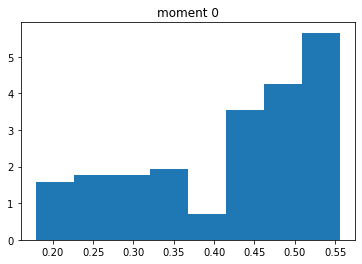

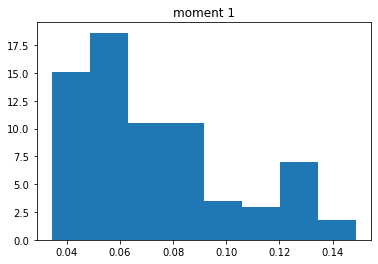

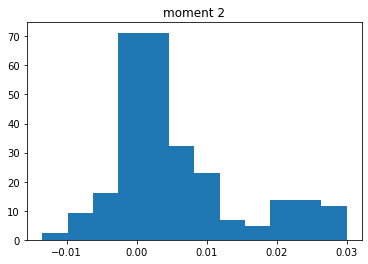

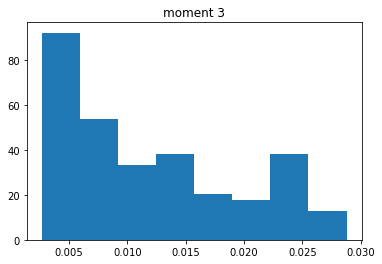

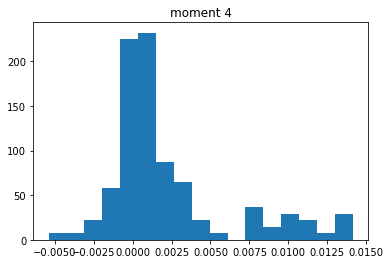

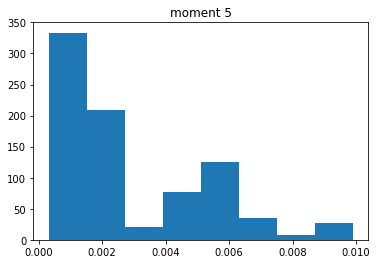

In [225]:
dem.get_histogram_of_moments(moments_df)

In [136]:
test_size = 0.2
cv = 5

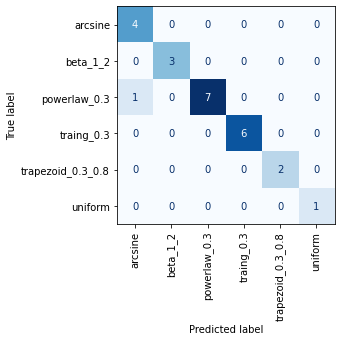

array([1., 1., 1., 1., 1.])

In [137]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [145]:
# testing number of smaples vs accuracy
acc_mean = []
acc_std = []
nr_sample_list = list(range(10,100))

for i in moments_list:
    moments_df = dem.get_moments_df(bounded_dists, nr_moments, i, sample_size)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

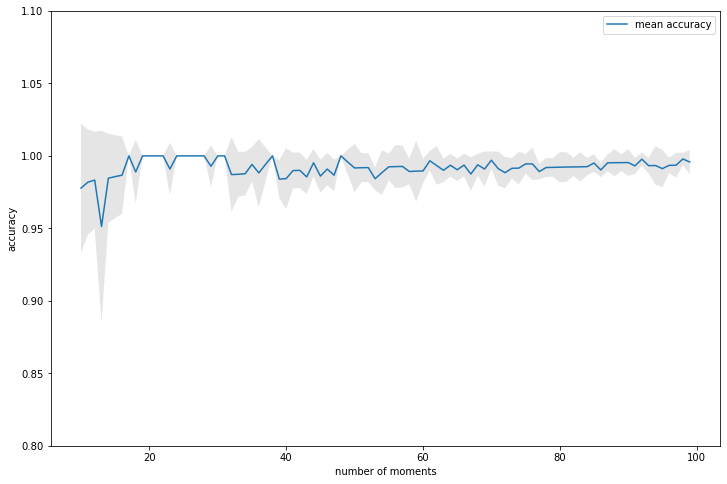

In [146]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_sample_list,acc_mean, label='mean accuracy')

plt.gca().fill_between(nr_sample_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.ylim(0.8,1.1)
plt.legend()

In [140]:
# testing number of moments vs accuracy
acc_mean = []
acc_std = []
nr_moments_list = list(range(2,40))

for i in nr_moments_list:
    moments_df = dem.get_moments_df(bounded_dists, i, nr_sample, sample_size)
    score = cm.svm_model(moments_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

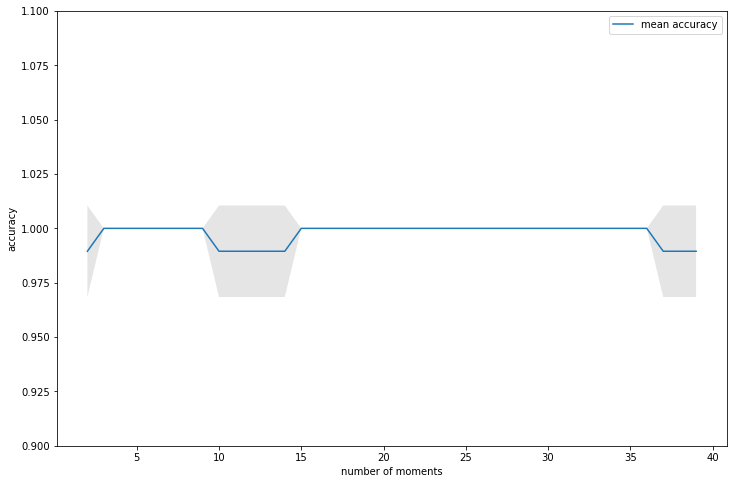

In [143]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(nr_moments_list,acc_mean, label='mean accuracy')

plt.gca().fill_between(nr_moments_list,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of moments')
plt.ylabel('accuracy')
plt.ylim(0.9,1.1)
plt.legend()

### Longtail distributions

In [254]:
longtail_dists = dm.get_longtail_distribution()
#dm.plot_histograms_of_samples(longtail_dists, sample_size, nr_sample)

In [255]:
moments_df = dem.get_moments_df(longtail_dists, nr_moments, nr_sample, sample_size)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,2.694987,43.363212,1536.514722,6.622916e+04,3.006032e+06,1.408291e+08,cauchy
1,1.678578,9.860843,205.852969,5.452013e+03,1.468516e+05,3.976253e+06,cauchy
2,3.143346,46.276931,1788.363833,9.051834e+04,4.787007e+06,2.575174e+08,cauchy
3,3.546117,194.855215,22774.533517,2.933098e+06,3.821316e+08,4.991683e+10,cauchy
4,2.835260,24.799479,498.591383,1.382007e+04,4.081871e+05,1.260643e+07,cauchy


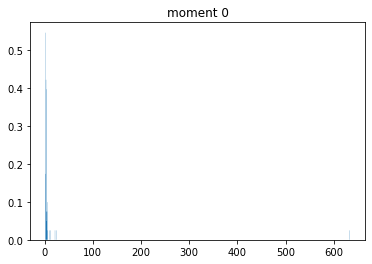

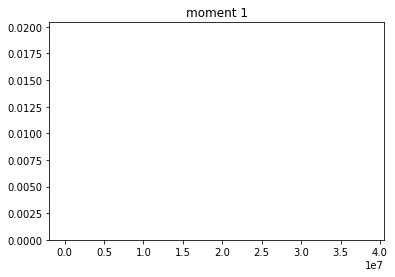

In [79]:
dem.get_histogram_of_moments(moments_df)

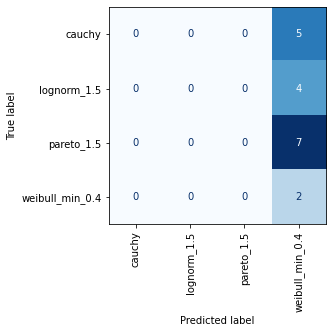

array([0.28571429, 0.28571429, 0.28571429, 0.35714286, 0.28571429])

In [70]:
cm.svm_model(moments_df, test_size, cv, plot=1)